<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 1

En esta notebook presentamos una serie de ejercicios para trabajar con variables aleatorias discretas, tanto númericas como cátegoricas, ejemplificando los conceptos de probabilidad explicados en clase. Lo primero es determinar si todas las librerías están correctamente instaladas.

In [1]:
# %matplotlib notebook
%matplotlib inline
import pandas
import numpy
import seaborn

In [2]:
seaborn.set_style('whitegrid')
seaborn.set_context('talk')

## Cargar el dataset en un dataframe de pandas

Los dataframes son tablas con un montón de operaciones ya programadas. Prácticamente todas las funciones de SQL se pueden realizar en pandas con pocas líneas. Además de eso, tiene funciones para leer y escribir archivos en numerosos formatos.

Ahora leemos directamente el archivo .csv

In [3]:
dataset = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [4]:
dataset[:3]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN


Los valores para los años no tienen un formato consistente en todas las filas, por lo que los procesaremos antes de comenzar. Los valores de año faltantes son reemplazados por NaN, y como la representación de enteros de numpy no soporta este tipo de valores, convertiremos cada año a tipo numpy.float. Otras decisiones pueden ser tomadas en este punto, como reemplazar los valores faltantes por 0 o elminarlos del dataset, dependiendo del tipo de datos que se requiera.

También cambiaremos el nombre de la columna año, ya que el caracter ñ no permite utilizar el syntax sugar de pandas donde se obtienen los valores de la columna con la sintáxis de llamar a un método.

In [5]:
import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)
# Se podrían también decodicar los nombres de provincias
# dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8"))

In [6]:
dataset.shape, dataset.year.dropna().shape

((1439, 18), (1316,))

---
# Ejercicios

### Ejercicio 1

* Crear una imagen mostrando la distribución de los eventos por año

* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

$$fdp(Y)$$

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?

* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

* Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

IMPORTANTE: ¿Qué hacemos con los datos faltantes?

In [164]:
dataset.groupby(["year"]).size().sort_values(ascending=False)

year
2016.0    297
2013.0    285
2014.0    241
2017.0    234
2015.0     87
2012.0     62
2010.0     21
2011.0     16
2009.0     10
2003.0      9
2002.0      7
2007.0      5
1990.0      5
2008.0      5
1991.0      5
1994.0      3
2005.0      3
2001.0      3
2000.0      3
2006.0      3
1993.0      2
1998.0      2
1999.0      2
2004.0      2
1996.0      1
1997.0      1
1989.0      1
1988.0      1
dtype: int64

In [168]:
fdps_year = dataset.year.value_counts(normalize=True)
fdps_year.sort_values(ascending=False)

2016.0    0.225684
2013.0    0.216565
2014.0    0.183131
2017.0    0.177812
2015.0    0.066109
2012.0    0.047112
2010.0    0.015957
2011.0    0.012158
2009.0    0.007599
2003.0    0.006839
2002.0    0.005319
1990.0    0.003799
2007.0    0.003799
2008.0    0.003799
1991.0    0.003799
2000.0    0.002280
1994.0    0.002280
2006.0    0.002280
2005.0    0.002280
2001.0    0.002280
1993.0    0.001520
1998.0    0.001520
2004.0    0.001520
1999.0    0.001520
1997.0    0.000760
1989.0    0.000760
1996.0    0.000760
1988.0    0.000760
Name: year, dtype: float64

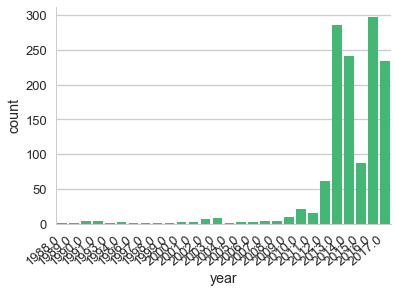

In [201]:
ay = seaborn.countplot(dataset.year, color='#2ecc71')
ay.set_xticklabels(ay.get_xticklabels(), rotation=40, ha="right")
seaborn.despine()

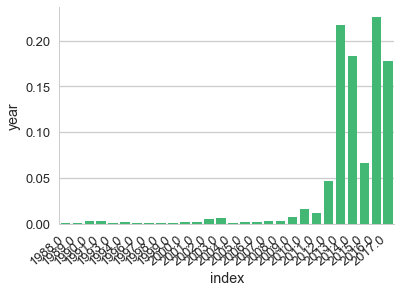

In [169]:
ax = seaborn.barplot(data=fdps_year.to_frame().reset_index(),
    x='index', y='year', color='#2ecc71')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
seaborn.despine()

## Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

$$fdp(X)$$

* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?
* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

In [170]:
fdps_provincia = dataset.provincia.value_counts(normalize=True)
fdps_provincia

Buenos Aires              0.693182
Ciudad de Buenos Aires    0.083097
Córdoba                   0.036932
Chubut                    0.026278
Chaco                     0.020597
Rio Negro                 0.019176
Neuquen                   0.014915
Santa Fe                  0.014205
Salta                     0.012074
Mendoza                   0.012074
Misiones                  0.007812
Tucuman                   0.007102
La Pampa                  0.007102
Formosa                   0.007102
Santiago del Estero       0.007102
Jujuy                     0.006392
Entre Rios                0.006392
La Rioja                  0.004261
Corrientes                0.003551
San Luis                  0.002841
Santa Cruz                0.002841
San Juan                  0.002131
Catamarca                 0.001420
Tierra del Fuego          0.001420
Name: provincia, dtype: float64

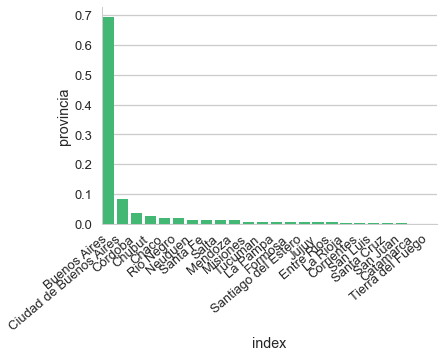

In [202]:
ap = seaborn.barplot(data=fdps_provincia.to_frame().reset_index(),
    x='index', y='provincia', color='#2ecc71')
ap.set_xticklabels(ap.get_xticklabels(), rotation=40, ha="right")
seaborn.despine()

### Ejercicio 3

* Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores.
¿Son eventos independientes?

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.


In [208]:
pandas.crosstab(index=dataset['year'],
            columns=dataset['provincia'], margins=True).apply(lambda r: r/len(dataset),
                                axis=1)

provincia,Buenos Aires,Catamarca,Chaco,Chubut,Ciudad de Buenos Aires,Corrientes,Córdoba,Entre Rios,Formosa,Jujuy,...,Rio Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago del Estero,Tierra del Fuego,Tucuman,All
year,,,,,,,,,,,,,,,,,,,,,
1988.0,0.000000,0.000000,0.000000,0.000000,0.000695,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000695
1989.0,0.000695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000695
1990.0,0.000000,0.000000,0.002780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003475
1991.0,0.002085,0.000000,0.000000,0.000000,0.001390,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003475
1993.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.001390,0.000000,0.000000,0.000000,0.000000,0.000000,0.001390
1994.0,0.000695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000695,0.000000,0.000000,0.000000,0.002085
1996.0,0.000000,0.000000,0.000000,0.000000,0.000695,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000695
1997.0,0.000000,0.000000,0.000000,0.000000,0.000695,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000695
1998.0,0.000000,0.000000,0.000000,0.000000,0.000695,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001390


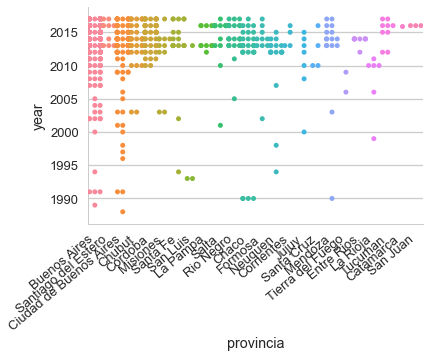

In [203]:
pa = seaborn.swarmplot(x="provincia", y="year", data=dataset);
pa.set_xticklabels(pa.get_xticklabels(), rotation=40, ha="right")
seaborn.despine()

## Ejercicio 4

Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

$$ fdp(z=penal ~~ |~~  z=comisaria ~~ | ...) $$

In [166]:
df = dataset['contexto1'].value_counts(normalize=True)
dependencias = ["Comisaría","Penal / Complejo Penitenciario PROVINCIAL","Penal / Complejo Penitenciario FEDERAL", "Centros de Detención Previos al Juicio (Alcaidia)", "Móviles y medios de transporte de Fuerzas de Seguridad","Centros de Detención Preventiva","Instalaciones de la Gendarmería Nacional"]
df.loc[dependencias].sort_values(ascending=False).sum()

0.8064981949458484

## Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia fisica’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

$$P(M~~|~~N)$$

* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?
* ¿Podemos concluir en que son eventos independientes dadas las muestras?

In [161]:
dataset.groupby(dataset['violencia_fisica'].notna())['violencia_psiquica'].value_counts() / dataset.groupby(dataset['violencia_fisica'].notna())['violencia_psiquica'].count() 

violencia_fisica  violencia_psiquica                                                                                                                                                                                            
False             Otras formas de maltrato psicológico                                                                                                                                                                              0.365651
                  Alejamiento de vínculos                                                                                                                                                                                           0.185596
                  Restricción injustificada derechos al trabajo y la educación                                                                                                                                                      0.099723
                  Amenazas                                      